# Visualizing Historical Bitcoin Prices

This notebook explores visualizing historical price data for Bitcoin. A colorized candlestick chart helps visualize daily price trends and larger time frame price trends together: https://en.wikipedia.org/wiki/Candlestick_chart

## Fetching Historical Price Data

* Use GDAX Exchange API: https://docs.gdax.com/#get-historic-rates
* Parse data and coerse into Pandas DataFrame

## Candlestick Chart

Use matplotlib and mpl finance library for candlestick support: https://github.com/matplotlib/mpl_finance

Chart shows:
* Bitcoin prices organized by day (in UTC)
* X-axis is Date
* Y-axis is Price at Open, High, Low, and Close of the day

## Interpretation
* Color:
   * Green candlesticks are "bullish" trend days (increased price)
   * Red candlesticks are "bearish" trend days (decreased price)
* Body: Difference between open and close, day's trend strengh
* Shadows: Day's price range, high above open/close, low below open/close

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Candlestick_chart_scheme_03-en.svg/490px-Candlestick_chart_scheme_03-en.svg.png" height='300' width='300' align='left' />

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/Candlestick_chart_scheme_01-en.svg/1200px-Candlestick_chart_scheme_01-en.svg.png" height='200' width='200' align='left' />


# Code

In [107]:
import requests, json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from mpl_finance import candlestick_ohlc
from datetime import datetime

URL = 'https://api.gdax.com/'
COLS = ['Date', 'Low', 'High', 'Open', 'Close', 'Volume']
DAILY = 86400

def get_historical_prices(product):
    r = requests.get(URL + f'/products/{product}/candles?granularity={DAILY}')
    df = pd.DataFrame(r.json(), columns=COLS)
    del df['Volume']
    df['Date'] = pd.to_datetime(df.Date, unit='s')
    df = df.set_index('Date')
    return df.sort_index()

def plot_candlestick(df, ax=None, fmt="%Y-%m-%d", title=None):
    if ax is None:
        fig, ax = plt.subplots(label="Price")
    idx_name = df.index.name
    dat = df.reset_index()[[idx_name, "Open", "High", "Low", "Close"]]
    dat[df.index.name] = dat[df.index.name].map(mdates.date2num)
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter(fmt))
    plt.xticks(rotation=45)
    lines, patches = candlestick_ohlc(ax, dat.values, width=.65, colorup='g')
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.set_title(title)
    bullish = mpatches.Patch(color='green', label='Bullish day')
    bearish = mpatches.Patch(color='red', label='Bearish day')
    plt.legend(handles=[bullish, bearish])
    return ax

bars = get_historical_prices('BTC-USD')['2018-04':]
bars.tail()

,Low,High,Open,Close
Date,,,,
2018-06-23,6040.01,6250.00,6059.82,6178.29
2018-06-24,5777.00,6255.80,6178.29,6149.99
2018-06-25,6070.13,6340.01,6150.00,6246.01
2018-06-26,6006.39,6271.00,6246.01,6074.95
2018-06-27,6020.00,6124.00,6074.01,6039.70


# Chart

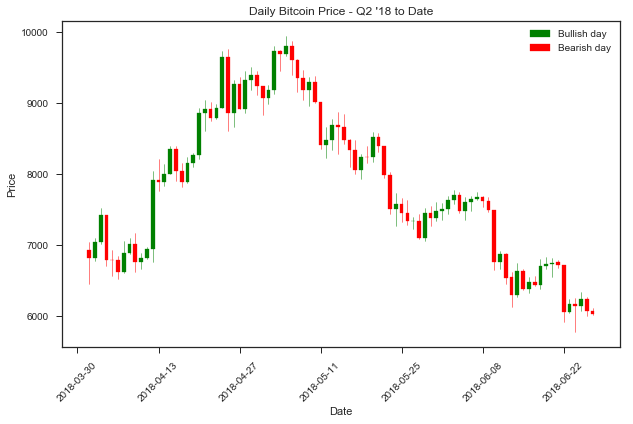

In [108]:
title = "Daily Bitcoin Price - Q2 '18 to Date"
fig, ax = plt.subplots(figsize=(10, 6))
ax = plot_candlestick(bars, ax=ax, title=title)

### Comparison

Compare and contrast the above candlestick chart with the default line chart below. 

Which is easier to intrepret day by day?

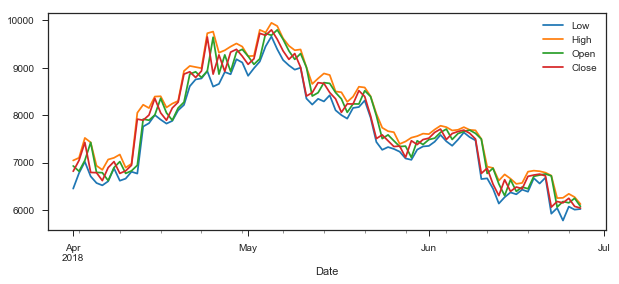

In [113]:
bars.plot(figsize=(10, 4))

# References

* Coursera Data Visualization: https://www.coursera.org/learn/datavisualization
* Bitcoin: https://bitcoin.org/en/
* Candlesticks: https://en.wikipedia.org/wiki/Candlestick_chart
* Python: https://www.python.org/
* Pandas: https://pandas.pydata.org/
* GDAX Exchange API: https://docs.gdax.com/
* Matplotlib: https://matplotlib.org/
* MPL Finance: https://github.com/matplotlib/mpl_finance
* Legends: https://matplotlib.org/users/legend_guide.html

Link to this notebook: http://bit.ly/2IvtWyq